# OpenCV & Mediapipe ÁöÑÊâãÂäøËØÜÂà´

ÂèÇËÄÉÔºö[dirkzon/gesture-recognition: Real time gesture recognition using OpenCV & Mediapipe](https://github.com/dirkzon/gesture-recognition)

Ëøô‰∏™Á¨îËÆ∞Êú¨ÁöÑÁõÆÁöÑÊòØÂ∞ùËØïÂàõÂª∫‰∏Ä‰∏™ÂèØ‰ª•‰ªéÂõæÂÉè‰∏≠ËØÜÂà´ÊâãÂäøÁöÑÊú∫Âô®Â≠¶‰π†Ê®°Âûã„ÄÇ‰∏∫‰∫ÜËØÜÂà´ÊâãÁöÑÂßøÊÄÅÔºå‰ΩøÁî® OpenCV ÁöÑ OpenPose Ê®°Âûã„ÄÇËøô‰∏™Ê®°ÂûãÂ∞ÜËøîÂõû‰∏Ä‰∫õÂú®Êâã‰∏äÈ¢ÑÂÆöÔºàpredeterminedÔºâÁöÑÁÇπ„ÄÇÁÑ∂ÂêéÊàë‰ª¨ÂèØ‰ª•ËÆ≠ÁªÉ‰∏Ä‰∏™Ê®°ÂûãÂ∞ÜËøô‰∫õÁÇπÂàÜÁ±ªÊàê‰∏Ä‰∫õÊâãÂäøÊÑè‰πâ„ÄÇËØ•ÊñπÊ≥ïÂàÜÁ¶ª‰∫ÜËØÜÂà´ÊâãÁöÑÂÖ≥Ê≥®ÁÇπÔºåÂπ∂ÂØπÁÇπËøõË°åÂàÜÁ±ª„ÄÇ

![Knipsel.PNG](logo/Knipsel.png)

In [1]:
import cv2
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

‰∏ãÈù¢Êàë‰ª¨ÂèØ‰ª•ÁúãÂà∞‰∏Ä‰∏™ÊâãËØ≠ÊâãÂäøÁöÑ‰æãÂ≠ê„ÄÇËøô‰∏™ÊâãÂäøÁöÑÊ†áÁ≠æÊòØ‚Äú3‚Äù„ÄÇ

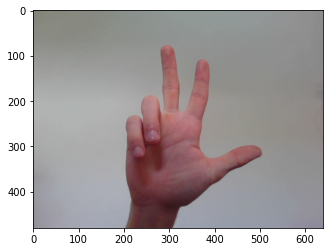

In [3]:
frame = cv2.imread("../test_images/3.jpg")
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
plt.show()

## ËΩΩÂÖ•Ê®°Âûã

‰ΩøÁî® [OpenCV](https://opencv.org/) Â§ÑÁêÜÊâÄÊúâÂõæÂÉè„ÄÇÂä†‰∏äÈ¢ÑÂÖàËÆ≠ÁªÉÁöÑ [OpenPose](https://github.com/CMU-Perceptual-Computing-Lab/openpose) Ê®°ÂûãÔºå‰æøÂèØ‰ª•ËØÜÂà´ÊâãÂäø„ÄÇË¶Å‰ΩøÁî®Ëøô‰∏™Ê®°ÂûãÔºåÊàë‰ª¨ÈúÄË¶Å‰∏§‰∏™‰∏úË•øÔºöÊ®°ÂûãÊú¨Ë∫´Âíå‰∏Ä‰∏™ `'.prototxt'` Êñá‰ª∂„ÄÇËøô‰∏§‰∏™Êñá‰ª∂ÈÉΩÂ∫îËØ•ÊîæÂú® `../openpose` ÁõÆÂΩï‰∏≠„ÄÇ'`pose_deploy.prototxt`' Â∑≤ÁªèÊîæÂú®Âú®Ëøô‰∏™ÁõÆÂΩïÈáåÔºå‰ΩÜÊòØÊ®°ÂûãÊ≤°ÊúâÔºåÈúÄË¶ÅÂéª[‰∏ãËΩΩ](https://www.kaggle.com/changethetuneman/openpose-model?select=pose_iter_102000.caffemodel)„ÄÇ‰∏ãËΩΩÊ®°ÂûãÂêéÔºåÂèØ‰ª•Âú® OpenCV ‰∏≠Âä†ËΩΩËøô‰∏§‰∏™Êñá‰ª∂„ÄÇ‰ΩøÁî® OpenCV ËÄå‰∏çÊòØ Mediapipe Êù•Â§ÑÁêÜÊâãÁöÑÂéüÂõ†ÊòØ `openpose` Ê®°ÂûãÊõ¥ÈÄÇÂêà‰ΩéÂàÜËæ®ÁéáÁöÑÂõæÂÉèÔºå‰πüÊõ¥ÁÅµÊ¥ª„ÄÇ‰ΩøÁî® OpenCV ÁöÑ‰∏Ä‰∏™Áº∫ÁÇπÊòØÂÆÉÊØî `medipipe` Ê®°ÂûãÊÖ¢ÂæóÂ§ö„ÄÇ‰ΩÜËøôÂπ∂‰∏çÈáçË¶ÅÔºåÂõ†‰∏∫Êàë‰ª¨Âè™ÈúÄË¶ÅÂ§ÑÁêÜÂõæÂÉè‰∏ÄÊ¨°„ÄÇ

In [4]:
protoFile = "../openpose/pose_deploy.prototxt"
weightsFile = "../openpose/pose_iter_102000.caffemodel"
net = cv2.dnn.readNetFromCaffe(protoFile, weightsFile)

## È¢ÑÊµã

OpenPose Ê®°ÂûãÈÄöËøáËØÜÂà´Êâã‰∏äÁöÑÁâπÂÆöÁÇπÊù•ÂèëÊå•‰ΩúÁî®„ÄÇÊ®°ÂûãÁöÑËæìÂÖ•ÊòØ‰∏Ä‰∏™ blobÔºå‰∏Ä‰∏™ blob Ë°®Á§∫ÂõæÂÉè‰∏≠ÂÉèÁ¥†ÁöÑËøûÊé•Âå∫Âüü„ÄÇÂèØ‰ª•Â∞ÜËøô‰∏™ blob ‰º†ÈÄíÁªô `OpenPose` Ê®°Âûã„ÄÇÂæóÂà∞‰∫Ü‰∏Ä‰∏™Ê¶ÇÁéáÊò†Â∞ÑÁöÑÂàóË°®„ÄÇ

In [5]:
frameCopy = np.copy(frame)
frameWidth = frame.shape[1]
frameHeight = frame.shape[0]
aspect_ratio = frameWidth/frameHeight
threshold = 0.1

# ‰∏∫ÁΩëÁªúËæìÂÖ•ÂõæÂÉèÂ∞∫ÂØ∏
inHeight = 368
inWidth = int(((aspect_ratio*inHeight)*8)//8)
# ËΩ¨Êç¢ÂõæÁâá‰∏∫ blob
inpBlob = cv2.dnn.blobFromImage(frame, 1.0 / 255, (inWidth, inHeight),
                          (0, 0, 0), swapRB=False, crop=False)

net.setInput(inpBlob)

# ‰ªé openpose Ê®°ÂûãËé∑ÂæóËæìÂá∫
output = net.forward()

‰∏ãÈù¢ÁöÑÂõæÁâáÊòØËøô‰∫õÊ¶ÇÁéáÂõæÁöÑ‰æãÂ≠ê„ÄÇÊúâ‰∫ÆÂÉèÁ¥†ÁöÑÂå∫ÂüüÊòØÊ®°ÂûãÈ¢ÑÊµãÁöÑÊâã‰∏äÁöÑÊüê‰∏™ÁÇπ„ÄÇÊâãÂíåÊâãÊåá‰∏äÁöÑËøô‰∫õÁÇπÊòØÁî± `OpenPose` Ê®°ÂûãÂÆö‰πâÁöÑ„ÄÇ

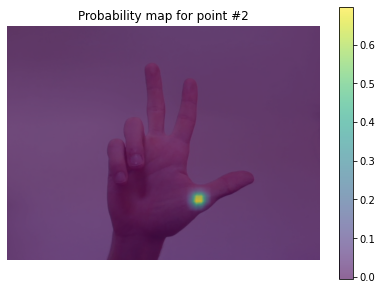

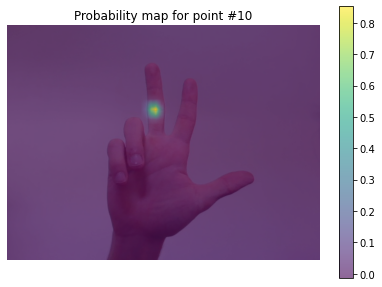

In [6]:
for i in [2, 10]:
    probMap = output[0, i, :, :]
    probMap = cv2.resize(probMap, (frame.shape[1], frame.shape[0]))
    plt.figure(figsize=[7,5])
    plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
    plt.imshow(probMap, alpha=0.6)
    plt.colorbar()
    plt.title(f'Probability map for point #{i}')
    plt.axis("off")
plt.show()

## Ëé∑ÂèñÁÇπ

Ê®°Âûã‰∏≠ÔºåÊÄªÂÖ±ËøîÂõû 21 ‰∏™Ê¶ÇÁéáÂõæ„ÄÇÁé∞Âú®ÂèØ‰ª•ÈÅçÂéÜËøô‰∫õÊò†Â∞ÑÊù•ÊèêÂèñËøô‰∫õÁÇπ„ÄÇËÉΩÂæóÂà∞ÁöÑÁÇπÊï∞ÊòØ 21„ÄÇÊâãÁöÑÂ∫ïÈÉ®Êúâ‰∏Ä‰∏™ÁÇπÔºåÊØèÊ†πÊâãÊåáÊúâ 4 ‰∏™ÁÇπ„ÄÇËøô‰∫õÁÇπÂ∫îËØ•ÊÄªÊòØÂú®ÊâãÊéåÁöÑÁõ∏Âêå‰ΩçÁΩÆ„ÄÇ‰ΩÜÊòØÔºåÂ¶ÇÊûúÊ¶ÇÁéáÂõæ‰∏≠ÁöÑÂå∫Âüü‰Ωé‰∫éÈòàÂÄºÔºåÂÆÉÂ∞Ü‰∏ç‰ºöË¢´ÂåÖÊã¨Âú®ÂÜÖÔºåÂõ†‰∏∫ÂÆÉÂæàÂèØËÉΩ‰∏çÊòØÈùûÂ∏∏ÂáÜÁ°Æ„ÄÇÊÄªÂÖ±Êúâ 42 ‰∏™‰∏çÂêåÁöÑÂÄºÔºåÂõ†‰∏∫ÊØè‰∏™ÁÇπÈÉΩÊúâ‰∏Ä‰∏™  `x` Âíå `y` ÂÄº„ÄÇËøô‰∫õÂÄºÂ∞ÜÁî®‰∫éËÆ≠ÁªÉÂá∫ÊâãÂäøËØÜÂà´Ê®°Âûã„ÄÇ

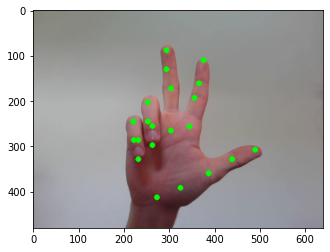

In [7]:
for i in range(21):
    # get confidence map of hand
    probMap = output[0, i, ...]
    probMap = cv2.resize(probMap, (frameWidth, frameHeight))

    # Find maxima of the confidence map
    minVal, prob, minLoc, point = cv2.minMaxLoc(probMap)
    
    # draw point if probabilty is greater than theshold
    if prob > 0.1 :
        cv2.circle(frameCopy, (int(point[0]), int(point[1])), 6, (0, 255, 0), thickness=-1, lineType=cv2.FILLED)
        
plt.imshow(cv2.cvtColor(frameCopy, cv2.COLOR_BGR2RGB))
plt.show()

## ÂõæÂÉèÂ§ÑÁêÜ

### Êï∞ÊçÆÈõÜ

Áé∞Âú®Êàë‰ª¨Áü•ÈÅì‰∫ÜÂ¶Ç‰ΩïÂ§ÑÁêÜ‰∏Ä‰∏™ÂõæÂÉèÔºåÊàë‰ª¨ÂèØ‰ª•‰ªéÂ§ÑÁêÜÊï∞ÊçÆÈõÜÂºÄÂßã„ÄÇÊàë‰ª¨Â∞Ü‰ΩøÁî®ÁöÑÊï∞ÊçÆÈõÜÊòØ‰∏çÂåÖÂê´Âú®Ëøô‰∏™Â≠òÂÇ®Â∫ì‰∏≠„ÄÇÊï∞ÊçÆÈõÜÂèØ‰ª•‰∏ãËΩΩ[ËøôÈáå](https://github.com/ardamavi/Sign-Language-Digits-Dataset)„ÄÇÂπ∂‰∏îÂ∫îËØ•ÊîæÂú®Ê†πÁõÆÂΩï‰∏≠ÁöÑ‰∏Ä‰∏™Âêç‰∏∫ `draft` ÁöÑÁõÆÂΩï‰∏≠„ÄÇÊï∞ÊçÆÈõÜÁöÑÊØè‰∏™Â≠êÊñá‰ª∂Â§πÈÉΩÂ∫îËØ•ÊîæÂú®Ëøô‰∏™ `draft` ÁõÆÂΩï‰∏≠„ÄÇÁîüÊàêÂ¶Ç‰∏ãÊâÄÁ§∫ÁöÑÊ†πÊñá‰ª∂Â§π„ÄÇ`draft` Êñá‰ª∂Â§πÂ∫îËØ•ÂåÖÂê´ÊØè‰∏™ÊâãÂäøÁöÑÂ≠êÊñá‰ª∂Â§π„ÄÇËøô‰∫õÊñá‰ª∂Â§πÈáåÊúâÂØπÂ∫îÁöÑÂõæÁâá„ÄÇ

. <br>
‚îú‚îÄ üóã docs/gesture-recognition.ipynb <br>
‚îú‚îÄ üóÅ draft/ <br>
‚îÇ  ‚îú‚îÄüóÄ 0/ <br>
‚îÇ  ‚îú‚îÄüóÄ 1/ <br>
‚îÇ  ‚îú‚îÄüóÄ 2/ <br>
‚îÇ  ‚îú‚îÄüóÄ 4/ <br>
‚îÇ  ‚îú‚îÄüóÄ 5/ <br>
‚îÇ  ‚îú‚îÄüóÄ 6/ <br>
‚îÇ  ‚îú‚îÄüóÄ 7/ <br>
‚îÇ  ‚îú‚îÄüóÄ 8/ <br>
‚îÇ  ‚îú‚îÄüóÄ 9/ <br>
‚îú‚îÄüóÄ test_images/ <br>
‚îú‚îÄ...


ÊØè‰∏™Â≠êÊñá‰ª∂Â§πÁöÑÂêçÁß∞ÊòØÊâãÂäøÁöÑÊ†áÁ≠æ„ÄÇÊØè‰∏™ÊâãÂäøÂ§ßÁ∫¶Êúâ 200 Âº†ÂõæÁâá„ÄÇËøô‰∫õÂõæÂÉèÊòØ‰∏çÂêåÁßçÁ±ªÁöÑÊâãÂú®‰∏çÂêåÁöÑÁÖßÊòéÊù°‰ª∂„ÄÇÊâÄÊúâÂõæÂÉèÈÉΩÊòØ 100 √ó 100 ÂÉèÁ¥†„ÄÇ

>*Mavi, A., (2020), ‚ÄúA New Dataset and Proposed Convolutional Neural Network Architecture for Classification of American Sign Language Digits‚Äù, arXiv:2011.08927 [cs.CV]*

### Â§ÑÁêÜ

Áé∞Âú®ÂèØ‰ª•ÂºÄÂßãÂ§ÑÁêÜÊï∞ÊçÆÈõÜ‰∫Ü„ÄÇÂèØ‰ª•ÁúãÂà∞‰∏âÁßçÊñπÊ≥ï„ÄÇÊØè‰∏™ÊñπÊ≥ïË¥üË¥£ÊµÅÁ®ã‰∏≠ÁöÑ‰∏çÂêåÊ≠•È™§„ÄÇÊÄª‰πãÔºåÊàë‰ª¨Âè™ÊòØÂæ™ÁéØÈÅçÂéÜ‰∫Ü `draft` ÁõÆÂΩï‰∏≠ÁöÑÊØè‰∏™Â≠êÊñá‰ª∂Â§π„ÄÇÁÑ∂ÂêéÈÄê‰∏™Â§ÑÁêÜÂõæÂÉèÔºåÂπ∂Â∞ÜËøô‰∫õÁÇπÊ∑ªÂä†Âà∞‰∏Ä‰∏™Êï∞ÁªÑ‰∏≠„ÄÇ

‰∏ãÈù¢ÁöÑÊñπÊ≥ïË¥üË¥£‰ªé OpenPose Ê®°ÂûãÁöÑËæìÂá∫‰∏≠Ëé∑ÂèñÁÇπ„ÄÇ

In [8]:
def get_points(nPoints, net_output, shape, threshold):
    output_points = []
    
    for i in range(nPoints):
        # get confidence map of hand
        probMap = net_output[0, i, ...]
        probMap = cv2.resize(probMap, shape)
        
        # Find maxima of the confidence map
        minVal, prob, minLoc, point = cv2.minMaxLoc(probMap)
        
        # append point if probabilty is greater than theshold
        if prob > threshold:
            output_points.append(int(point[0]))
            output_points.append(int(point[1]))
        else:
            output_points.append(None)
            output_points.append(None)
            
    return output_points

‰∏ãÈù¢ÁöÑÊñπÊ≥ïË¥üË¥£Â∞ÜÂõæÂÉèËΩ¨Êç¢‰∏∫‰∏Ä‰∏™ blobÔºåÂπ∂Â∞ÜËøô‰∏™ blob ‰º†ÈÄíÁªô OpenPose Ê®°Âûã„ÄÇÁÑ∂Âêé‰ΩøÁî® `get_points` ÊñπÊ≥ïËé∑ÂèñÁÇπÊï∞„ÄÇÊúÄÂêéÊääËøô‰∏™ÊâãÂäøÂä†Âà∞ `arary` ‰∏≠„ÄÇ

In [9]:
def process_image(frame):
    # input image dimensions for the network
    frameWidth = frame.shape[1]
    frameHeight = frame.shape[0]
    inHeight = 368
    inWidth = int(((frameWidth/frameHeight*inHeight)*8)//8)
    
    #transform image into blob
    inpBlob = cv2.dnn.blobFromImage(frame, 1.0 / 255, (inWidth, inHeight),
                      (0, 0, 0), swapRB=False, crop=False)
    
    # get output from openpose model
    net.setInput(inpBlob)
    output = net.forward()
    
    # get points out of output
    return get_points(21, output, (frameWidth,frameHeight), 0.1)

‰∏∫‰∫ÜÂ§ÑÁêÜÊï∞ÊçÆÈõÜ‰∏≠ÁöÑÊâÄÊúâÂõæÂÉèÔºåÊàë‰ª¨ÂèØ‰ª•ÈÅçÂéÜ‚ÄúÊï∞Â≠óÊâãÂäø‚ÄùÊñá‰ª∂Â§π‰∏≠ÁöÑÊâÄÊúâÊñá‰ª∂Â§π„ÄÇÁÑ∂ÂêéÂæ™ÁéØÈÅçÂéÜËøô‰∫õÊñá‰ª∂Â§π‰∏≠ÁöÑÊâÄÊúâÂõæÂÉè„ÄÇ‰ΩøÁî®'`process_image`'ÊñπÊ≥ïÔºåÈÄê‰∏™Â§ÑÁêÜËøô‰∫õÂõæÂÉè„ÄÇÂ∞ÜËæìÂá∫Êï∞ÁªÑÊ∑ªÂä†Âà∞ `array` ‰∏≠„ÄÇ

In [10]:
from IPython.display import clear_output
import os

folder = '../draft'

array = []

# iterate through all folders
for subfolder in os.listdir(folder):
    sub = folder +'/'+ subfolder
    subfolder_size = len(os.listdir(sub))
    i = 0
    # iterate through all subfolders
    for file in os.listdir(sub):
        frame = cv2.imread(sub + '/' + file)
        points = process_image(frame)
        points_gesture = np.append(points, subfolder, axis=None)
        array.append(points_gesture)
        print("processing: " + subfolder)
        i += 1
        print((i/subfolder_size) * 100, '%')
        clear_output(wait=True)

processing: 9
100.0 %


### ÂàõÂª∫ dataframe

Âú®Â§ÑÁêÜÊâÄÊúâÂõæÂÉèÂêéÔºåËØ•ÈòµÂàóÂèØ‰ª•ËΩ¨Êç¢‰∏∫‰∏Ä‰∏™ dataframe„ÄÇÂâç 42 ÂàóÊòØÁÇπÊòØ‰ΩçÁΩÆ„ÄÇ‰æãÂ¶ÇÔºåÂàó'0'Âíå'1'Ë°®Á§∫Á¨¨‰∏Ä‰∏™ÁÇπÔºå'3'Âíå'4'Ë°®Á§∫Á¨¨‰∫å‰∏™ÁÇπÔºåÁ≠âÁ≠â„ÄÇÊúÄÂêé‰∏ÄÊ†èÊòØÊâãÂäøÁöÑÂê´‰πâ

In [33]:
processed = pd.DataFrame(array)
# Â∞ÜÊúÄÂêé‰∏ÄÂàóÈáçÂëΩÂêç‰∏∫‚Äúgesture‚Äù
processed = processed.rename(columns={processed.columns[-1]:"gesture"})
processed.head()

0   1     2     3     4     5     6     7     8     9  ...  33  34  35  \
0  66  70    55    64    44    53    39    44    35    38  ...  46  62  39   
1  52  76    57    61    59    46    62    31    59    23  ...  28  42  47   
2  55  83    51    72    46    58  None  None  None  None  ...  25  57  53   
3  51  88    46    75  None  None  None  None  None  None  ...  29  45  44   
4  31  81  None  None  None  None    70    33    73    29  ...  35  40  37   

   36  37  38  39  40  41 gesture  
0  53  39  48  42  48  46       0  
1  44  26  51  22  55  29       0  
2  59  40  59  31  60  31       0  
3  50  24  57  21  64  29       0  
4  55  29  63  33  68  39       0  

[5 rows x 43 columns]

ÊúÄÂêéÔºåÂèØ‰ª•Â∞ÜÊï∞ÊçÆÂ∏ß‰øùÂ≠ò‰∏∫'.csv'Êñá‰ª∂„ÄÇÂõ†Ê≠§ÔºåÂèØ‰ª•Âú®Êú™Êù•ÂÜçÊ¨°‰ΩøÁî®Êï∞ÊçÆÔºåËÄå‰∏çÂøÖÂÜçÊ¨°Â§ÑÁêÜÊï¥‰∏™Êï∞ÊçÆÈõÜ„ÄÇ

In [34]:
processed.to_csv('../dataframes/gesture-points-raw.csv', index=None)

In [35]:
processed = pd.read_csv('../dataframes/gesture-points-raw.csv')

## È¢ÑÂ§ÑÁêÜ

Áé∞Âú®Êúâ‰∫ÜÂ§ÑÁêÜÊâÄÊúâÂõæÂÉèÁöÑÁÇπÊï∞ÊçÆÔºåÂèØ‰ª•ÂºÄÂßãÊ∏ÖÁêÜÂíåÂ§ÑÁêÜÊï∞ÊçÆÈõÜ„ÄÇ

### ‰øÆÂ§ç none ÂÄº

È¶ñÂÖàÔºåÊàë‰ª¨ÂèØ‰ª•ÁúãÂà∞Êï∞ÊçÆÂ∏ß‰∏≠ÊúâÂæàÂ§ö `none` ÂÄº„ÄÇÊâÄ‰ª•ÔºåÈ¶ñÂÖàÂøÖÈ°ª‰øÆÊ≠£ÂÆÉ„ÄÇÂ¶ÇÊûúÊü•Áúã‰∏¢Â§±ÁöÑÂçïÂÖÉÊ†ºÊï∞ÈáèÔºåÂàôÊØè‰∏ÄÂàóÈÉΩÊúâ‰∏Ä‰∫õ‰∏¢Â§±ÁöÑÂÄº„ÄÇ‰ΩÜÊòØ‰∏çÂ≠òÂú®ÊâÄÊúâÂÄºÈÉΩÁº∫Â§±ÁöÑÂàó„ÄÇËøôÊÑèÂë≥ÁùÄÂ∞ÜËÉΩÂ§ü‰ΩøÁî®Ëøô‰∫õ‰∏çÁº∫Â§±ÁöÑÂÄºÊù•‰øÆÂ§çÁº∫Â§±ÁöÑÂÄº„ÄÇ‰øÆÂ§çËøô‰∫õÂÄºÁöÑ‰∏ÄÁßçÊñπÊ≥ïÊòØËé∑ÂèñÊØè‰∏™ÂàóÁöÑÂπ≥ÂùáÂÄº„ÄÇÂõ†‰∏∫ÊØè‰∏ÄÂàóÈÉΩ‰ª£Ë°®Âêå‰∏ÄÁÇπ‰∏äÁöÑÁõ∏ÂêåÂÄºÔºåÊâÄ‰ª•ÂÆÉ‰ª¨Â∫îËØ•ÊòØÂùáÂåÄÁöÑ„ÄÇ‰ΩÜ‰∏çËÉΩÂèñÊï¥ÂàóÁöÑÂπ≥ÂùáÂÄºÂõ†‰∏∫Êúâ‰∏çÂêåÁöÑÊâãÂäø„ÄÇÈúÄË¶ÅÂæóÂà∞ÊâãÂäøÁõ∏ÂêåÁöÑÈÇ£‰∏ÄÂàóÁöÑÂπ≥ÂùáÂÄº„ÄÇ

In [36]:
processed[processed.columns[::2]].isnull().sum()

0          340
2          218
4           94
6           84
8          165
10          77
12          43
14          64
16         148
18          99
20          82
22         182
24         166
26         177
28         106
30         186
32         343
34         195
36          88
38         109
40         131
gesture      0
dtype: int64

Âõ†Ê≠§ÔºåÈ¶ñÂÖàÈúÄË¶ÅÈÄöËøáÊâãÂäøÂØπÊï∞ÊçÆÂ∏ßËøõË°åÂàÜÁªÑ„ÄÇÁÑ∂ÂêéÈÅçÂéÜÊØèÁªÑ‰∏≠ÁöÑÊâÄÊúâÂàó„ÄÇÁî®Ëøô‰∏ÄÂàóÁöÑÂπ≥ÂùáÂÄºÊõøÊç¢Áº∫Â§±ÁöÑÂÄº„ÄÇ

In [37]:
# loop through each of the gesture groups
for name, group in processed.groupby(["gesture"]):
    # loop through each column
    for label, content in group.items():
        av = content.loc[content.notna()].mean()
        form = processed['gesture'] == name 
        processed.loc[form, label] = processed.loc[form, label].fillna(int(av))

In [38]:
processed.head(3)

0     1     2     3     4     5     6     7     8     9  ...    33  \
0  66.0  70.0  55.0  64.0  44.0  53.0  39.0  44.0  35.0  38.0  ...  46.0   
1  52.0  76.0  57.0  61.0  59.0  46.0  62.0  31.0  59.0  23.0  ...  28.0   
2  55.0  83.0  51.0  72.0  46.0  58.0  62.0  43.0  66.0  35.0  ...  25.0   

     34    35    36    37    38    39    40    41  gesture  
0  62.0  39.0  53.0  39.0  48.0  42.0  48.0  46.0        0  
1  42.0  47.0  44.0  26.0  51.0  22.0  55.0  29.0        0  
2  57.0  53.0  59.0  40.0  59.0  31.0  60.0  31.0        0  

[3 rows x 43 columns]

ÊúÄÁªàÔºåÊï∞ÊçÆÂ∏ß‰∏≠Ê≤°ÊúâÊõ¥Â§öÁº∫Â§±ÁöÑÂÄº„ÄÇ

In [39]:
print('There are {} missing values'.format(processed.isnull().sum().sum()))

There are 0 missing values


### Ê†áÂáÜÂåñ

Âú®Êé•‰∏ãÊù•ÁöÑÊ≠•È™§‰∏≠ÔºåÈúÄË¶ÅÂ∞ÜÊï∞ÊçÆÂ∏ßÂàÜÂâ≤ÊàêÁÇπÂíåÊâãÂäøÊï∞ÊçÆÂ∏ß„ÄÇ

In [40]:
gesture_points = processed.drop(['gesture'], axis=1)
gesture_meaning = processed['gesture']

Êé•‰∏ãÊù•ÔºåÂèØ‰ª•ËßÑËåÉÂåñÊï∞ÊçÆÂ∏ß„ÄÇÊØè‰∏ÄË°å‰∏≠ÁöÑÁÇπÈÉΩÊòØÁõ∏ÂØπ‰∫éÂõæÂÉèÁöÑÔºåËøôÂú®Âª∫Ê®°Êó∂‰∏çÊòØÂæàÂ•Ω„ÄÇÂõ†‰∏∫ÂÆûÈôÖÁöÑÊâãÂèØËÉΩ‰æùËµñ‰∫éÂõæÁâáÁöÑ‰∏çÂêå‰ΩçÁΩÆÔºåÂç≥‰ΩøÈÄöËøáÁõ∏ÂêåÁöÑÊâãÂäøÂºÄÂßã„ÄÇÂõ†Ê≠§ÔºåÈúÄË¶ÅËé∑ÂæóÊâãÁöÑ‰ΩçÁΩÆÊï∞ÊçÆÔºåÂêåÊó∂Ê∂àÈô§Âú®ÂõæÂÉè‰∏≠ÁöÑ‰ΩçÁΩÆÂ∑ÆÂºÇ„ÄÇÂè¶‰∏Ä‰∏™ÈóÆÈ¢òÊòØÂõæÁâá‰∏≠ÊâãÁöÑÂ§ßÂ∞è‰∏çÂêå„ÄÇÂõ†‰∏∫ÂΩìÊâãÁ¶ªÊëÑÂÉèÊú∫ËæÉËøëÊàñËæÉËøúÊó∂ÔºåÁÇπ‰ºö‰∏çÂêåÔºå‰ΩÜÊâãÂäøÊòØÁõ∏ÂêåÁöÑ„ÄÇ

ÂØπÊï∞ÊçÆÂ∏ßËøõË°åËßÑËåÉÂåñÂèØ‰ª•Ëß£ÂÜ≥Ëøô‰∏§‰∏™ÈóÆÈ¢ò„ÄÇËøôÂèØ‰ª•ÈÄöËøá‰∏ãÈù¢ÁöÑÂÖ¨ÂºèÊù•ÂÆûÁé∞„ÄÇ

$$\frac{\text{value} - \text{min}}{\text{max} ‚Äì \text{min}}$$

Êï∞ÊçÆÂ∏ß‰∏≠ÁöÑÊØè‰∏™ÂÄºÈÉΩÂ∞ÜÊò†Â∞ÑÂà∞ 0 Âíå 1 ‰πãÈó¥„ÄÇÊâÄ‰ª•ÂèØ‰ª•ËØ¥ÊâãÁöÑ‰ΩçÁΩÆÊîπÂèò‰∫ÜÂõ†‰∏∫Ëøô‰∫õÁÇπÂú®1Âíå0‰πãÈó¥ÁßªÂä®„ÄÇÊØî‰æã‰πü‰ºöÊîπÂèòÔºåÂõ†‰∏∫ÂÆÉ‰ª¨Âú®1Âà∞0‰πãÈó¥„ÄÇËøôÊÑèÂë≥ÁùÄÁé∞Âú®ÊâãÁöÑÊØî‰æãÂíå‰ΩçÁΩÆÈÉΩÂú®1Âíå0‰πãÈó¥„ÄÇ

In [41]:
for index, row in gesture_points.iterrows():
    reshape = np.asarray([row[i::2] for i in range(2)])
    min = reshape.min(axis=1, keepdims=True)
    max = reshape.max(axis=1, keepdims=True)
    normalized = np.stack((reshape-min)/(max-min), axis=1).flatten()
    gesture_points.iloc[[index]] = [normalized]

In [42]:
gesture_points.head(3)

0    1         2         3         4         5         6         7  \
0  1.000000  1.0  0.645161  0.877551  0.290323  0.653061  0.129032  0.469388   
1  0.565217  1.0  0.782609  0.741379  0.869565  0.482759  1.000000  0.224138   
2  0.607143  1.0  0.464286  0.819672  0.285714  0.590164  0.857143  0.344262   

          8         9  ...        32        33        34        35        36  \
0  0.000000  0.346939  ...  0.354839  0.510204  0.870968  0.367347  0.580645   
1  0.869565  0.086207  ...  0.782609  0.172414  0.130435  0.500000  0.217391   
2  1.000000  0.213115  ...  0.750000  0.049180  0.678571  0.508197  0.750000   

         37        38        39        40        41  
0  0.367347  0.419355  0.428571  0.419355  0.510204  
1  0.137931  0.521739  0.068966  0.695652  0.189655  
2  0.295082  0.750000  0.147541  0.785714  0.147541  

[3 rows x 42 columns]

Âú®‰∏ãÈù¢ÁöÑ‰æãÂ≠ê‰∏≠ÔºåÊàë‰ª¨ÂèØ‰ª•ÁúãÂà∞Ëøô‰∫õÁÇπÁé∞Âú®ÊòØÂ¶Ç‰ΩïËßÑËåÉÂåñÁöÑ„ÄÇËøô‰∫õÁÇπË¢´Êãâ‰º∏Âà∞frameÁöÑËæπÁïå„ÄÇ

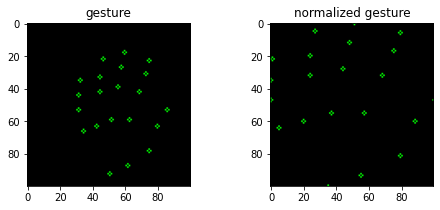

In [43]:
blank = np.zeros((100,100,3), np.uint8)
index = 1100
copy, copy_norm = np.copy(blank), np.copy(blank)
for n, m in zip(np.reshape(processed.drop(['gesture'], axis=1).iloc[[index]].values, (-1, 2)), 
                np.reshape(gesture_points.iloc[[index]].values, (-1, 2))):
    cv2.circle(copy, (int(n[0]), int(n[1])), 1, (0, 255, 0))
    cv2.circle(copy_norm, (int(m[0]*100), int(m[1]*100)), 1, (0, 255, 0))

fig, axes = plt.subplots(1, 2, figsize=(8, 3))
axes[0].imshow(copy)
axes[0].set_title('gesture')
axes[1].imshow(copy_norm)
axes[1].set_title('normalized gesture')
plt.show()

### ÁøªËΩ¨ÊâãÂäø

Ê≠£Â¶ÇÊàë‰ª¨‰πãÂâçÁúãÂà∞ÁöÑÔºåÊï∞ÊçÆÈõÜÂè™ÊúâÂè≥Êâã„ÄÇËøôÊÑèÂë≥ÁùÄËØ•Ê®°ÂûãÂ∞ÜÂè™ËÉΩËØÜÂà´Âè≥ÊâãÁöÑÊâãÂäø„ÄÇ‰∏∫‰∫ÜËÉΩÂ§üËØÜÂà´Â∑¶ÊâãÊàë‰ª¨ÈúÄË¶ÅÊääÂ∑¶ÊâãÁöÑÁÇπÂä†Ëµ∑Êù•„ÄÇ‰∏ÄÁßçÊñπÊ≥ïÊòØÂú®ÂõæÂÉèÂ§ÑÁêÜÈÉ®ÂàÜÁøªËΩ¨ÂõæÂÉè„ÄÇ‰ΩÜËøôÂ∞Ü‰ΩøÂ§ÑÁêÜÊó∂Èó¥Â¢ûÂä†‰∏ÄÂÄçÔºåËøôÂπ∂‰∏çÂ•Ω„ÄÇÂè¶‰∏ÄÁßçÊñπÊ≥ïÊòØÁî®Ê†áÂáÜÂåñÁÇπÊù•ÂÅö„ÄÇÂõ†‰∏∫Êàë‰ª¨ÈúÄË¶ÅÂú® x ËΩ¥‰∏äÁøªËΩ¨ÊâãÂäøÊàë‰ª¨ÂèØ‰ª•Áî®ÁÇπÁöÑ x ÂÄºÊù•ÁøªËΩ¨Âàó„ÄÇËøôÂèØ‰ª•ÈÄöËøáÁî®Êàë‰ª¨ÊÉ≥Ë¶ÅÁøªËΩ¨ÁöÑÂÄºÂáèÂéªÊúÄÂ§ßÂÄºÊù•ÂÆûÁé∞„ÄÇ

$$(1 - \text{value})$$

In [44]:
flipped_gesture_points = gesture_points.copy()
for c in flipped_gesture_points.columns.values[::2]:
    flipped_gesture_points.loc[:, c] = (1 - flipped_gesture_points.loc[:, c])
flipped_gesture_points.head(3)

0    1         2         3         4         5         6         7  \
0  0.000000  1.0  0.354839  0.877551  0.709677  0.653061  0.870968  0.469388   
1  0.434783  1.0  0.217391  0.741379  0.130435  0.482759  0.000000  0.224138   
2  0.392857  1.0  0.535714  0.819672  0.714286  0.590164  0.142857  0.344262   

          8         9  ...        32        33        34        35        36  \
0  1.000000  0.346939  ...  0.645161  0.510204  0.129032  0.367347  0.419355   
1  0.130435  0.086207  ...  0.217391  0.172414  0.869565  0.500000  0.782609   
2  0.000000  0.213115  ...  0.250000  0.049180  0.321429  0.508197  0.250000   

         37        38        39        40        41  
0  0.367347  0.580645  0.428571  0.580645  0.510204  
1  0.137931  0.478261  0.068966  0.304348  0.189655  
2  0.295082  0.250000  0.147541  0.214286  0.147541  

[3 rows x 42 columns]

Âú®‰∏ãÈù¢ÁöÑ‰æãÂ≠ê‰∏≠ÔºåÊàë‰ª¨ÂèØ‰ª•ÁúãÂà∞‰∏§‰∏™ËßÑËåÉÂåñÁöÑÊâãÂäø„ÄÇÂ∑¶ËæπÁöÑÂõæÂÉèÊòØÂéüÂßãÊâãÂäøÁÇπ„ÄÇÂè≥ËæπÁöÑÂõæÂÉèÊòØÁøªËΩ¨ÁöÑÊâãÂäøÁÇπ„ÄÇÁé∞Âú®Êàë‰ª¨Êúâ‰∫Ü‰∏Ä‰∏™ÊôÆÈÄöÁöÑÂíåÁøªËΩ¨ÁöÑÊâãÂäøÊï∞ÊçÆÂ∏ß„ÄÇ

Text(0.5, 1.0, 'flipped gesture')

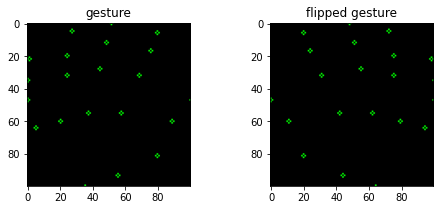

In [45]:
copy, copy_flipped = np.copy(blank), np.copy(blank)
for n, f in zip(np.reshape(gesture_points.iloc[[index]].values, (-1, 2)),  
                    np.reshape(flipped_gesture_points.iloc[[index]].values, (-1, 2))):
    cv2.circle(copy, (int(n[0]*100), int(n[1]*100)), 1, (0, 255, 0))
    cv2.circle(copy_flipped, (int(f[0]*100), int(f[1]*100)), 1, (0, 255, 0))
    
fig, axes = plt.subplots(1, 2, figsize=(8, 3))
axes[0].imshow(copy)
axes[0].set_title('gesture')
axes[1].imshow(copy_flipped)
axes[1].set_title('flipped gesture')

### ÊúÄÁªàÁöÑ dataframe

ÊúÄÂêéÔºåÊàë‰ª¨ÂèØ‰ª•Â∞ÜÊâãÂäøÁÇπÂíåÁøªËΩ¨ÊâãÂäøÁÇπÁõ∏Âä†„ÄÇÂú®Á¨¨ 43 Ê†è‰∏≠Âä†‰∏äÊâãÂäøÁöÑÂê´‰πâ„ÄÇ

In [46]:
gestures = pd.concat([gesture_points, gesture_meaning], axis=1)
reverse_gestures = pd.concat([flipped_gesture_points, gesture_meaning], axis=1)
gesture_dataframe = gestures.append(reverse_gestures, ignore_index=True)

Áé∞Âú®Êï∞ÊçÆÂ∏ßÂ∑≤ÁªèË¢´Â§ÑÁêÜÔºåÊàë‰ª¨ÂèØ‰ª•Â∞ÜÂÆÉ‰øùÂ≠ò‰∏∫CSVÊñá‰ª∂ÔºåËøôÊ†∑‰ª•ÂêéÊàë‰ª¨Â∞±ÂèØ‰ª•ÂØºÂÖ•Êï∞ÊçÆÈõÜÔºåËÄå‰∏çÊòØÂÜçÊ¨°ËøêË°åÊâÄÊúâÂÜÖÂÆπ„ÄÇ

In [47]:
gesture_dataframe.to_csv('../dataframes/gesture-points-processed.csv', index=None)

In [48]:
gesture_dataframe = pd.read_csv('../dataframes/gesture-points-processed.csv')

## Âª∫Ê®°

### ÂáÜÂ§áÊï∞ÊçÆ

È¶ñÂÖàÔºåÊàë‰ª¨ÈúÄË¶ÅÂáÜÂ§áÂ•ΩÊï∞ÊçÆ„ÄÇ‰∏∫‰∫ÜËÆ≠ÁªÉÊ®°ÂûãÔºåÈúÄË¶Å‰∏Ä‰∏™ËÆ≠ÁªÉÂíåÊµãËØïÈõÜ„ÄÇËÆ≠ÁªÉÈõÜÁî®‰∫éËÆ≠ÁªÉÊ®°ÂûãÔºåÊµãËØïÈõÜÁî®‰∫éÈ™åËØÅÊ®°Âûã„ÄÇËÆ≠ÁªÉÂíåÊµãËØïÈÉΩÊúâ‰∏Ä‰∏™XÂíåyÂùêÊ†áÁ≥ª„ÄÇxÊï∞ÊçÆÊòØÁÇπÊï∞ÊçÆ„ÄÇyÊï∞ÊçÆÊòØÊ†áÁ≠æÊï∞ÊçÆ„ÄÇ

In [49]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(gesture_dataframe.drop('gesture', axis=1), 
                                                    gesture_dataframe['gesture'],
                                                    test_size = 0.2, 
                                                    random_state=42)

### ÈÄâÊã©ÁÆóÊ≥ï

‰∏∫‰∫ÜÈÄâÊã©Ê≠£Á°ÆÁöÑÁÆóÊ≥ïÔºåÊàë‰ª¨Â∞Ü‰ΩøÁî® Sklearn ÁöÑËøôÂº†ÂõæË°®„ÄÇ‰∏çÂêåÁöÑÁÆóÊ≥ïÊõ¥ÈÄÇÂêà‰∫é‰∏çÂêåÁ±ªÂûãÁöÑÊï∞ÊçÆÂíå‰∏çÂêåÁöÑÈóÆÈ¢ò„ÄÇÊâÄ‰ª•ÔºåÊàë‰ª¨Â∞ÜÊåâÁÖßËøô‰∏™ÂõæË°®„ÄÇÈ¶ñÂÖàÔºåÊàë‰ª¨ÂøÖÈ°ªÊ£ÄÊü•Êï∞ÊçÆÈõÜÊòØÂê¶ÊúâË∂ÖËøá 50 ‰∏™Ê†∑Êú¨ÔºåÂõ†‰∏∫Êàë‰ª¨ÊúâË∂ÖËøá 4000 Ë°å„ÄÇÂÆÉÈóÆÊàë‰ª¨ÊòØÂê¶Âú®È¢ÑÊµã‰∏Ä‰∏™Á±ªÂà´/Ê†áÁ≠æÔºåÊàë‰ª¨ËØïÂõæÈ¢ÑÊµã‰∏Ä‰∏™ÊâãÂäøÁöÑÊ†áÁ≠æ/Âê´‰πâÔºåÊâÄ‰ª•ËøôÂ∞ÜÊòØ‰∏Ä‰∏™‚ÄúÊòØ‚Äù„ÄÇÁÑ∂ÂêéÊàë‰ª¨ÂøÖÈ°ªÊ£ÄÊü•Êàë‰ª¨ÁöÑÊï∞ÊçÆÊòØÂê¶ÊúâÊ†áÁ≠æ„ÄÇÊòØÁöÑÔºåÂõ†‰∏∫ÊúÄÂêé‰∏ÄÂàóÊúâÊâãÂäøÁöÑÊÑèÊÄù„ÄÇÁÑ∂ÂêéÔºåÊàë‰ª¨ÈúÄË¶ÅÊ£ÄÊü•Êï∞ÊçÆÈõÜÁöÑÊ†∑Êú¨ÊòØÂê¶Â∞è‰∫é100000„ÄÇÊúÄÂêéÊàë‰ª¨ÂæóÂà∞‰∫Ü 'LinearSVC' ‰º∞ËÆ°Èáè„ÄÇ

![estimator chart](https://scikit-learn.org/stable/_static/ml_map.png)

### ËÆ≠ÁªÉ

Áé∞Âú®ÂèØ‰ª•ËÆ≠ÁªÉÊ®°Âûã„ÄÇ‰ªé‰∏äÈù¢ÁöÑÂõæË°®‰∏≠Êàë‰ª¨ÂæóÂá∫ÁªìËÆ∫ÔºålinearSVC ÊúÄÈÄÇÂêàËøô‰∏™Êï∞ÊçÆÈõÜ„ÄÇÂõ†Ê≠§ÔºåÂèØ‰ª•Áî®ËÆ≠ÁªÉÈõÜÊù•ËÆ≠ÁªÉÊ®°Âûã„ÄÇÁÑ∂ÂêéÁî®ÊµãËØïÊï∞ÊçÆÈõÜÂØπÊ®°ÂûãËøõË°åËØÑÂàÜ„ÄÇ

In [50]:
from sklearn.svm import SVC
import time

start = time.time()
#Training model
svm_model = SVC(kernel='poly', random_state=42, C=1.0, probability=True)
svm_model.fit(X_train, y_train)

#Calculating elapsed time
stop = time.time()
elapsed_time = ((stop - start) / 60)
print('Training time: {} minutes and {} seconds'
.format(int(elapsed_time), int(((elapsed_time % 1) * 60))))
    
#Calculating score
print('Score:',svm_model.score(X_test, y_test).round(2))

Training time: 0 minutes and 0 seconds
Score: 0.95


### È™åËØÅ

‰∏∫‰∫ÜÂèØËßÜÂåñÊ®°ÂûãÁöÑÈ¢ÑÊàêÂΩ¢ÔºåÂèØ‰ª•ÂàõÂª∫‰∏Ä‰∏™Ê∑∑Ê∑ÜÁü©Èòµ„ÄÇÁü©ÈòµÁöÑÊØè‰∏ÄË°å‰ª£Ë°®‰∏Ä‰∏™È¢ÑÊµãÂÄºÔºåËÄåÊØè‰∏ÄÂàóÊòØÂÆûÈôÖÂÄº‰∏≠ÁöÑÂÆû‰æã„ÄÇ

ÊâÄÊúâÊ†áÁ≠æÁöÑÂæóÂàÜÈÉΩÈ´ò‰∫é 0.9„ÄÇËøòÊúâ‰∏Ä‰∏™ÊâãÂäøÊòØÊ®°ÁâπÂæó1ÂàÜ„ÄÇËøôÂèØËÉΩÊÑèÂë≥ÁùÄËøô‰∏™ÊâãÂäø‰∏éÊï∞ÊçÆËøá‰∫éÂåπÈÖç„ÄÇ‰ΩÜÊàëËÆ§‰∏∫ÂÆÉ‰∏çÊòØÔºåÂõ†‰∏∫Êï∞ÊçÆÈõÜÊúâÂæàÂ§ö‰∏çÂêåÁöÑÂõæÂÉè„ÄÇ‰ªéËøô‰∏™Áü©ÈòµÂèØ‰ª•ÂÅáËÆæÊ®°ÂûãËÉΩÂ§üÊ∏ÖÊ•öÂú∞ÂàÜÁ¶ªÊØè‰∏™ÊâãÂäø„ÄÇ

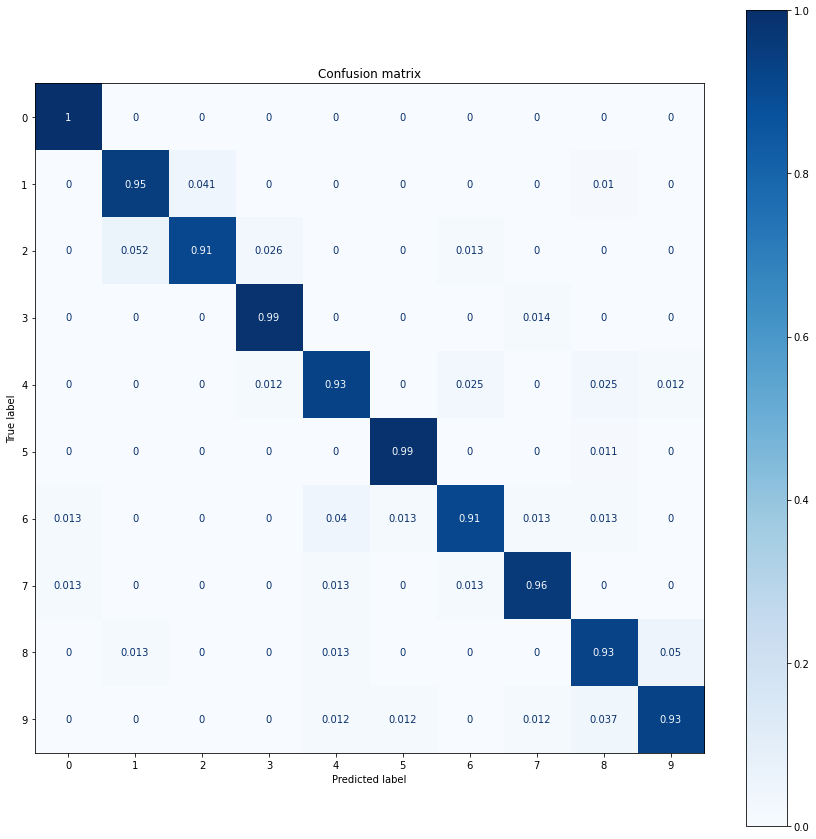

In [51]:
from sklearn.metrics import plot_confusion_matrix

# creating confusion matrix
fig, ax = plt.subplots(figsize=(15, 15))
matrix = plot_confusion_matrix(svm_model, X_test, y_test,
                                 cmap=plt.cm.Blues,
                                 normalize='true',
                                 ax=ax)

# plot the matrix
plt.title('Confusion matrix')
plt.show(matrix)

### ÊµãËØï

ÊúÄÂêéÔºåÂèØ‰ª•Áî®‰πãÂâçÊ≤°ÊúâËßÅËøáÁöÑÂõæÂÉèÊù•ÊµãËØïÊ®°Âûã„ÄÇÂØπ‰∫éËøô‰∏™ÊµãËØïÔºåÊàë‰ª¨Â∞Ü‰ΩøÁî® Mediapipe ËÄå‰∏çÊòØ OpenCV„ÄÇËøôÊòØÂõ†‰∏∫ Mediapipe ÁöÑÊâãÊ®°ÂûãÊØî‰ΩøÁî®ÊâãÂßøÂäøÊ®°ÂûãË¶ÅÂø´ÂæóÂ§ö„ÄÇ‰ΩøÁî®Ëøô‰∏™Ê®°ÂûãÁöÑÂè¶‰∏Ä‰∏™ÂéüÂõ†ÊòØÔºåÂÆÉËÉΩÂ§üÂú®‰∏Ä‰∏™ÂõæÂÉè‰∏≠ËØÜÂà´Â§ö‰∏™Êâã„ÄÇÁî®‰∫éÊµãËØïÊï∞ÊçÆ‰Ωç‰∫é `test_images/` Êñá‰ª∂Â§π‰∏≠„ÄÇËøô‰∏™Êñá‰ª∂Â§πÂåÖÂê´ 20 Âº†ÂõæÁâáÔºåÊØè‰∏™ÊâãÂäø‰∏§‰∏™„ÄÇÊØè‰∏™ÊâãÂäøÈÉΩÊúâ‰∏Ä‰∏™Â∑¶ÊâãÂíåÂè≥ÊâãÁöÑÂõæÂÉèÊù•ÊµãËØïÊ®°ÂûãÊòØÂê¶ÂèØ‰ª•È¢ÑÊµãÂèåÊâã„ÄÇÂØπ‰∫éÊØè‰∏™ÂõæÂÉèÔºå‰∏Ä‰∏™ÂõæÂΩ¢ÊòØÂàõÂª∫‰∏éÊØè‰∏™ÊâãÂäøÊ†áÁ≠æÁöÑÁΩÆ‰ø°Â∫¶„ÄÇÊ†áÂáÜË∂äÈ´òÔºåÊ®°ÂûãË∂äÁ°Æ‰ø°Ëá™Â∑±ÊòØÊ≠£Á°ÆÁöÑÊ†áÁ≠æ„ÄÇÂΩìÁÑ∂ÔºåÂÖ∑ÊúâÊúÄÈ´òÁΩÆ‰ø°Â∫¶ÁöÑÊ†áÁ≠æÂ∞ÜË¢´ËßÜ‰∏∫È¢ÑÊµãÁöÑÊ†áÁ≠æ„ÄÇ

In [53]:
from mediapipe.python.solutions import drawing_utils, hands
from pathlib import Path

# load the mediapipe hand model
hand_model = hands.Hands(static_image_mode=True)

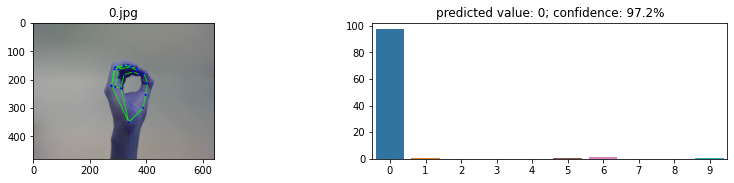

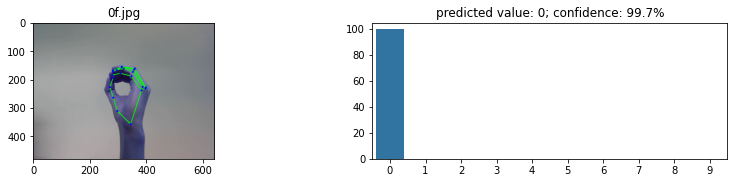

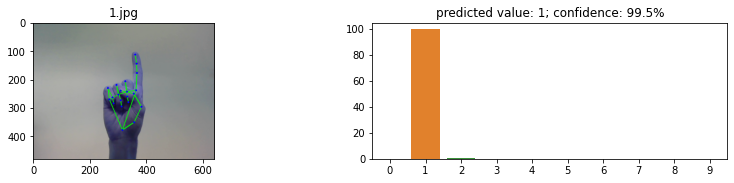

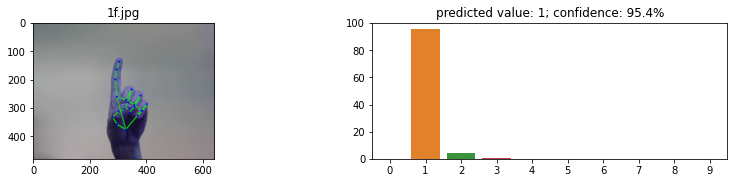

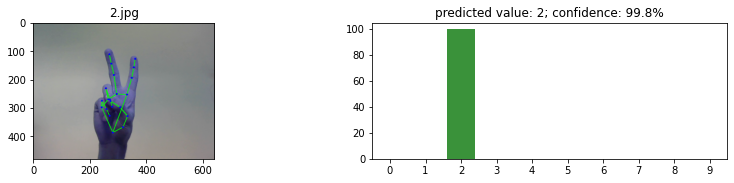

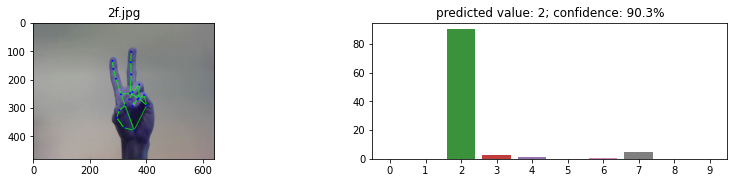

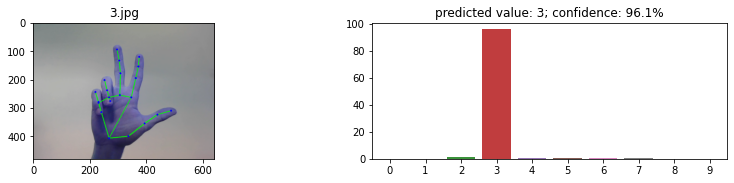

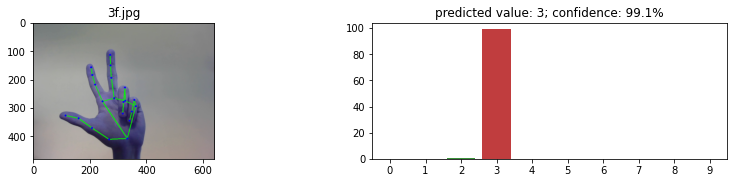

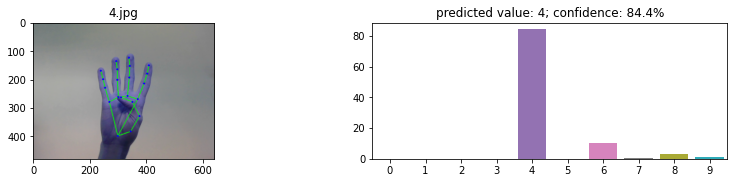

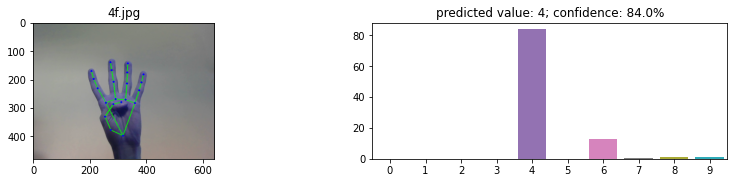

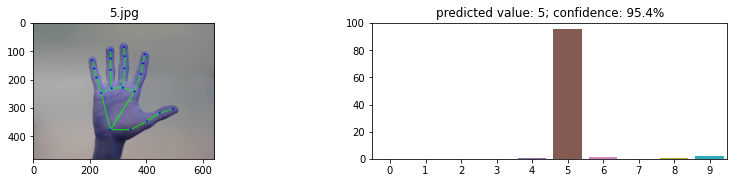

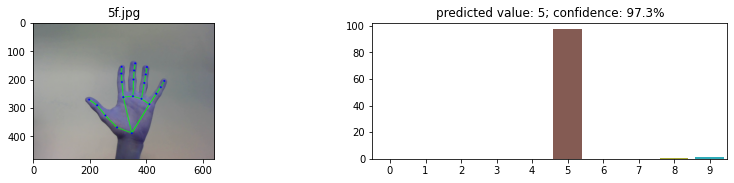

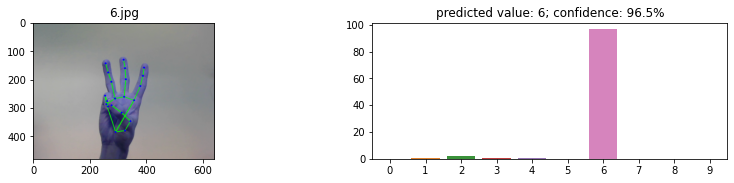

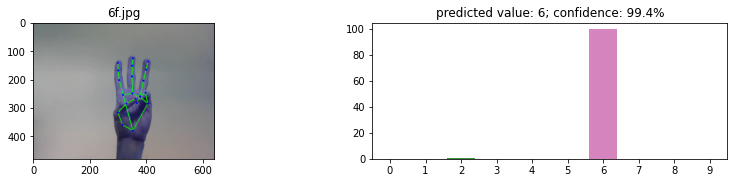

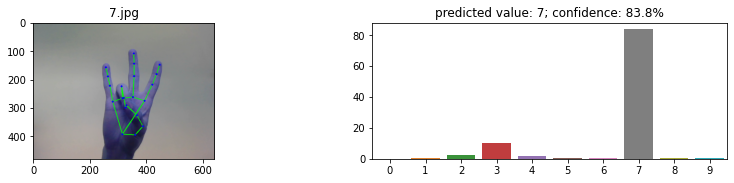

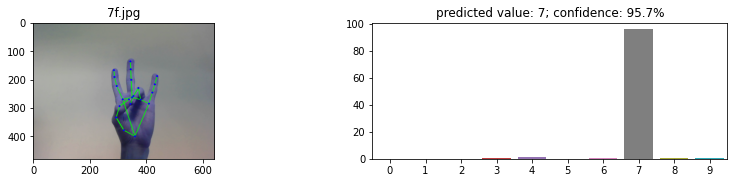

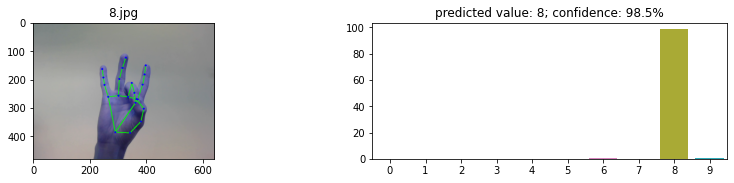

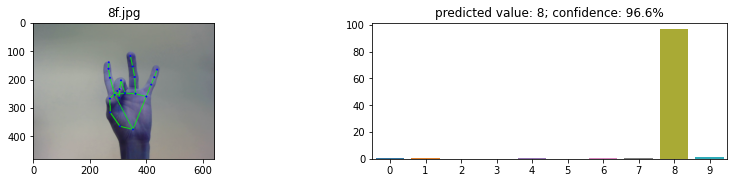

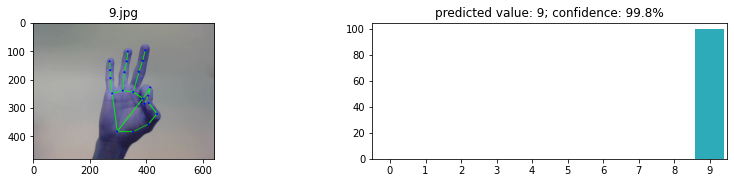

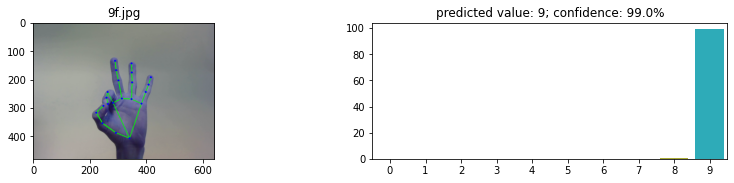

In [62]:
root = '../test_images'
# Âæ™ÁéØÈÅçÂéÜtestÊñá‰ª∂Â§π‰∏≠ÁöÑÊØè‰∏™ÂõæÂÉè
for path in Path(root).iterdir():
    example_im = cv2.imread(path.as_posix())
    # Ëé∑ÂæóÊâãÊ®°ÂûãÁöÑÈ¢ÑÊµã
    results = hand_model.process(cv2.cvtColor(example_im, cv2.COLOR_BGR2RGB))
    # Âú®ÂõæÂÉè‰∏äÁªòÂà∂È™®Êû∂
    if results.multi_hand_landmarks:
        landmarks = results.multi_hand_landmarks[0]
        drawing_utils.draw_landmarks(
            example_im, landmarks, hands.HAND_CONNECTIONS)

        # ‰ªéÈ¢ÑÊµã‰∏≠ÂæóÂà∞xÂíåyÁöÑÂÄº
        x, y = [], []
        for lm in landmarks.landmark:
            x.append(lm.x)
            y.append(lm.y)

        # Ê†áÂáÜÂåñÁÇπ
        points = np.asarray([x, y])
        min = points.min(axis=1, keepdims=True)
        max = points.max(axis=1, keepdims=True)
        normalized = np.stack((points-min)/(max-min), axis=1).flatten()
        # ‰ªéÊâãÂäøÊ®°Âûã‰∏≠Ëé∑ÂæóÈ¢ÑÊµã
        pred = svm_model.predict_proba([normalized])

        # Ëé∑ÂæóÊâãÂäøÈ¢ÑÊµãÂíåÁΩÆ‰ø°Â∫¶
        gesture = pred.argmax(axis=1)[0]
        confidence = pred.max()

        # ÊòæÁ§∫ÂõæÂÉèÂπ∂ÁªòÂà∂ÂõæÂΩ¢
        fig, axes = plt.subplots(1, 2, figsize=(14, 2.5))
        axes[0].imshow(example_im, cmap=plt.cm.gray)
        axes[0].set_title(path.name)
        sns.barplot(y=(pred[0] * 100), x=np.arange(10))
        axes[1].set_title(
            f'predicted value: {gesture}; confidence: {confidence:.1%}')

ËøôÊ¨°ËØïÈ™åÁöÑÁªìÊûúÁõ∏ÂΩìÊàêÂäü„ÄÇÊâÄÊúâÁöÑÊµãËØïÂõæÂÉèÈÉΩÂæóÂà∞‰∫ÜÊ≠£Á°ÆÁöÑÈ¢ÑÊµãÔºåÁΩÆ‰ø°Â∫¶‰ªéÊú™‰Ωé‰∫é 80%„ÄÇ‰ø°‰ªªÂ∫¶ÊúÄ‰ΩéÁöÑÊâãÂäøÊòØ‚Äú4‚ÄùÔºåÂ∑¶ÊâãÂíåÂè≥ÊâãÁöÑ‰ø°‰ªªÂ∫¶ÈÉΩÂú® 84% Â∑¶Âè≥„ÄÇÂØπ‰∫éÂâ©‰∏ãÁöÑÊâÄÊúâÂõæÂÉèÔºåÂ∑¶ÊâãÂíåÂè≥Êâã‰πãÈó¥ÁöÑÁΩÆ‰ø°Â∫¶ÊòØÈùûÂ∏∏Áõ∏‰ººÁöÑ„ÄÇ

## ÂØºÂá∫Ê®°Âûã

Áé∞Âú®Êàë‰ª¨Â∑≤ÁªèÂàõÂª∫‰∫Ü‰∏Ä‰∏™ÊàêÂäüÁöÑÊ®°ÂûãÔºåÊàë‰ª¨ÂèØ‰ª•ÂØºÂá∫ÂÆÉ‰∫Ü„ÄÇÈÄöËøá [joblib](https://joblib.readthedocs.io/en/latest/) ÂåÖÔºåÊàë‰ª¨ÂèØ‰ª•Â∞ÜÊ®°ÂûãÂØºÂá∫‰∏∫`pickle`„ÄÇPickle ÊòØ Python ÂØπË±°ÁöÑÂ∫èÂàóÂåñÂíåÂèçÂ∫èÂàóÂåñÂçèËÆÆ„ÄÇÁ®çÂêéÔºåÊàë‰ª¨ÂèØ‰ª•ÈÄöËøá‰ΩøÁî® `joblib` ÂåÖÂä†ËΩΩÊ®°ÂûãÊù•ÂÜçÊ¨°‰ΩøÁî®Ê®°Âûã„ÄÇ

In [63]:
import joblib

joblib.dump(svm_model, '../model/gesture_model.pkl', compress=9)

['../model/gesture_model.pkl']